In [1]:
library(dplyr)
source("~/sc-online/utils.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
fingerprinting = read.table("/mnt/accessory/seq_data/calico/calico_fingerprinting", header = F, sep = "\t", skip=17)


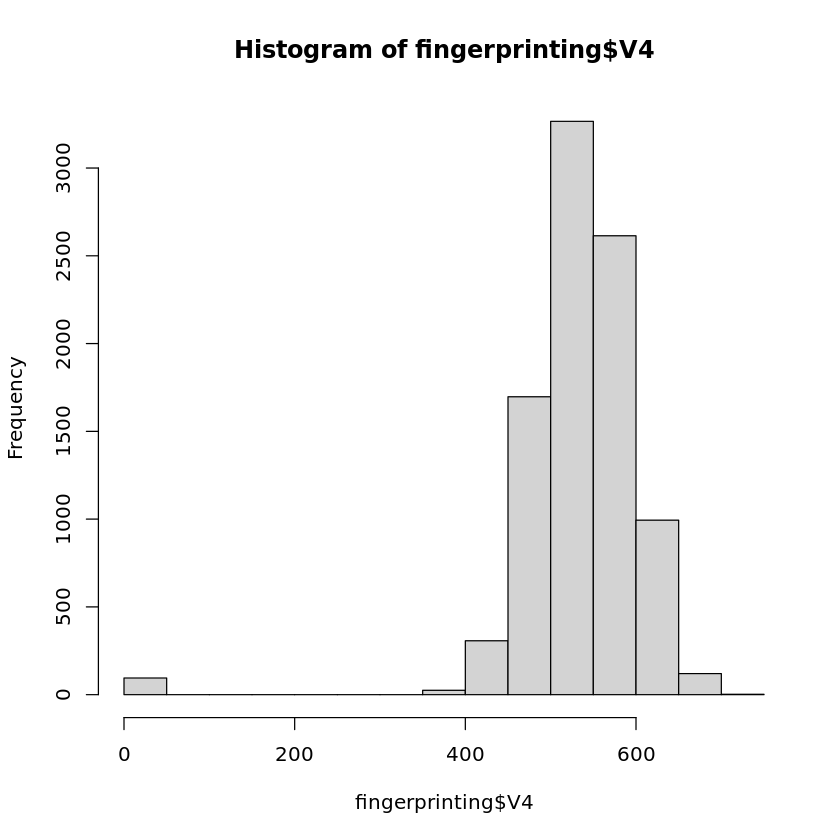

In [5]:
hist(fingerprinting$V4)

In [4]:
dim(fingerprinting)

[1] 9120    6

In [56]:
getWideMat = function(mat, row_colname, col_colname, data_colname, is_triangular=FALSE){

    unique_rows = unique(mat[[row_colname]])
    unique_cols = unique(mat[[col_colname]])

    # Create an empty matrix
    mat_wide <- matrix(nrow = length(unique_rows), ncol = length(unique_cols),
                                dimnames = list(unique_rows, unique_cols))

    # Loop over each row of the long matrix
    for (i in 1:nrow(mat)) {
        # Get the current row
        row <- mat[i, ]

        # Assign the value of V4 to the corresponding cell in the matrix
        mat_wide[row[[row_colname]], row[[col_colname]]] <- row[[data_colname]]
    }
    if(is_triangular){
        mat_wide[upper.tri(mat_wide)] = mat_wide[lower.tri(mat_wide)]
    }
    return(mat_wide)

}

getGroups = function(
    discomat, 
    gt_check_type = "between",
    key_colname = "V2", 
    value_colname="V3", 
    data_colname="V4", 
    disco_cutoff=3e7){

    if (gt_check_type == "between"){
        is_triangular = FALSE
    } else {
        is_triangular = TRUE
    }

    discomat_wide = getWideMat(discomat, value_colname, key_colname, data_colname, is_triangular)

    groups = list()

    if (gt_check_type == "between"){
        for (colname in colnames(discomat_wide)){
            col = discomat_wide[, colname]
            if (min(col) < disco_cutoff){
                groups[[colname]] = rownames(discomat_wide)[col < disco_cutoff]
            }
        }
    }
    

    # # Get row and column pairs where the data is less than the cutoff
    # indices <- which(discomat_wide < disco_cutoff, arr.ind = TRUE)  
    
    # # Get row and column names
    # row_names <- dimnames(discomat_wide)[[1]][indices[,1]]
    # col_names <- dimnames(discomat_wide)[[2]][indices[,2]]

    # # Combine row and column names into a data frame
    # name_pairs <- data.frame(row = row_names, column = col_names)

    # groups = list()
    # if (gt_check_type == "within") {
    #     for (i in 1:nrow(name_pairs)) {
    #         rowval = name_pairs[i,1]
    #         colval = name_pairs[i,2]

    #         if ((! rowval %in% names(groups)) & (! colval %in% names(groups))) {
    #             # if the row and column names are not in the groups list, add them
    #             groups[[rowval]] = c(rowval, colval)
    #         } else if ((rowval %in% names(groups)) & (! colval %in% names(groups))) {
    #             # if the row name is in the groups list, but the column name is not, 
    #             #add the column name to the row name's group
    #             groups[[rowval]] = c(groups[[rowval]], colval)
    #         } else if ((! rowval %in% names(groups)) & (colval %in% names(groups))) {
    #             # if the column name is in the groups list, but the row name is not,
    #             # add the row name to the column name's group
    #             groups[[colval]] = c(groups[[colval]], rowval)
    #         } else {
    #             # if both the row and column names are in the groups list,
    #             # merge the two groups together
    #             groups[[colval]] = c(groups[[colval]], rowval)
    #         }    
    #     }
        
    # } else if (gt_check_type == "between") {
    #     for (i in 1:nrow(name_pairs)) {
    #         rowval = name_pairs[i,1]
    #         colval = name_pairs[i,2]

    #         if (! rowval %in% names(groups)) {
    #             # if the row is not in the groups list, add the column to the row's group
    #             groups[[rowval]] = c(rowval, colval)
    #         } else {
    #             # if the row is in the groups list, add the column to the row's group
    #             groups[[rowval]] = c(groups[[rowval]], colval)
    #         }
            
    #     }
        
    # }
    
    #sort groups by the length of their objects
    groups = groups[order(sapply(groups, length), decreasing = T)]

    # for every group, join elements together with the '|' delimeter 
    groups = lapply(groups, function(x) paste(sort(x), collapse = "|"))

    # return the groups
    return(groups)

}

fgs = getGroups(fingerprinting, key_colname="V2", value_colname="V3", gt_check_type="between", disco_cutoff=200)
length(unique(fingerprinting$V3))
length(unique(fingerprinting$V2))
length(fgs)


[1] 76

[1] 120

[1] 90

In [57]:
fgs

$`206954930010_R05C02`
[1] "PDC110_Pons|PDC110_SN"

$`206954930011_R04C01`
[1] "PD0976_SN|PD0976_SN_2"

$`206954930011_R05C01`
[1] "PD0833_SN|PD0833_SN_R"

$`206954930093_R07C01`
[1] "PD0906_SN|PD0906_SN_2"

$`207762950108_R02C01`
[1] "PDC094_SN|PDC094_VTA"

$`206954930010_R01C01`
[1] "PDC090_SN"

$`206954930010_R02C01`
[1] "PDC139_SN"

$`206954930010_R03C01`
[1] "PD0730_SN"

$`206954930010_R03C02`
[1] "PD0940_SN"

$`206954930010_R04C01`
[1] "PDC078_SN"

$`206954930010_R05C01`
[1] "PD0870_SN"

$`206954930010_R06C01`
[1] "PDC092_SN"

$`206954930010_R07C01`
[1] "PD0968_SN"

$`206954930010_R08C01`
[1] "PD0793_SN"

$`206954930010_R09C01`
[1] "PDC164_SN"

$`206954930010_R10C01`
[1] "PD0875_SN"

$`206954930011_R02C01`
[1] "PD0954_SN"

$`206954930011_R02C02`
[1] "PD0847_SN"

$`206954930011_R03C01`
[1] "PDC123_SN"

$`206954930011_R03C02`
[1] "PD0911_SN"

$`206954930011_R04C02`
[1] "PD0980_SN"

$`206954930011_R06C02`
[1] "PD0985_SN"

$`206954930011_R08C01`
[1] "PDC126_Pons"

$`206954930011_R08C02`
[1] "PD0918_SN"

$`206954930011_R09C02`
[1] "PDC089_SN"

$`206954930011_R10C01`
[1] "PD0825_SN"

$`206954930011_R10C02`
[1] "PD0935_SN"

$`206954930011_R11C02`
[1] "PDC165_SN"

$`206954930011_R12C01`
[1] "PD0957_SN"

$`206954930011_R12C02`
[1] "PD0897_SN"

$`206954930060_R02C01`
[1] "PD0876_SN"

$`206954930060_R02C02`
[1] "PD0800_SN"

$`206954930060_R04C01`
[1] "PD0834_SN"

$`206954930060_R04C02`
[1] "PD0905_SN"

$`206954930060_R05C02`
[1] "PD0926_SN"

$`206954930060_R07C01`
[1] "PD0903_SN"

$`206954930060_R07C02`
[1] "PD0902_SN"

$`206954930060_R10C01`
[1] "PD0746_SN"

$`206954930060_R10C02`
[1] "PD0839_SN"

$`206954930060_R11C01`
[1] "PD0784_SN"

$`206954930060_R11C02`
[1] "PDC091_SN"

$`206954930060_R12C01`
[1] "PD0904_SN"

$`206954930060_R12C02`
[1] "PD0936_SN"

$`206954930093_R01C02`
[1] "PDC093_SN"

$`206954930093_R02C01`
[1] "PD0970_SN"

$`206954930093_R03C01`
[1] "PDC111_SN"

$`206954930093_R03C02`
[1] "PD0878_SN"

$`206954930093_R04C02`
[1] "PD0938_SN"

$`206954930093_R05C02`
[1] "PDC078_SN"

$`206954930093_R06C02`
[1] "PDC112_SN"

$`206954930093_R07C02`
[1] "PD0736_SN"

$`206954930093_R08C01`
[1] "PDC114_SN"

$`206954930093_R08C02`
[1] "PD0899_SN"

$`206954930093_R09C01`
[1] "PDC088_SN"

$`206954930093_R10C01`
[1] "PD0809_SN"

$`206954930093_R10C02`
[1] "PDC128_NonSN"

$`206954930093_R11C02`
[1] "PDC121_SN"

$`206954930093_R12C01`
[1] "PD0916_SN"

$`207758480019_R01C01`
[1] "NBB_2019-114_SN"

$`207762950055_R02C01`
[1] "PD0903_SN"

$`207762950055_R03C02`
[1] "NBB_2019-114_SN"

$`207762950055_R04C01`
[1] "NBB_2008-028_SN"

$`207762950055_R05C02`
[1] "PD0809_SN"

$`207762950055_R07C02`
[1] "PDC078_SN"

$`207762950055_R08C02`
[1] "NBB_2018-130_SN"

$`207762950055_R10C02`
[1] "PD0899_SN"

$`207762950055_R11C01`
[1] "NBB_2019-102_SN"

$`207762950055_R12C02`
[1] "PDC089_SN"

$`207762950086_R02C01`
[1] "PD0878_SN"

$`207762950086_R03C02`
[1] "NBB_2018-130_SN"

$`207762950086_R04C01`
[1] "PD0876_SN"

$`207762950086_R05C02`
[1] "PD0968_SN"

$`207762950086_R06C02`
[1] "NBB_2008-052_SN"

$`207762950086_R07C02`
[1] "NBB_2009-016_SN"

$`207762950086_R08C02`
[1] "NBB_2019-071_SN"

$`207762950086_R10C02`
[1] "PD0825_SN"

$`207762950086_R11C01`
[1] "NBB_2002-086_SN"

$`207762950086_R12C02`
[1] "NBB_2019-017_SN"

$`207762950108_R01C02`
[1] "NBB_2019-017_SN"

$`207762950108_R03C02`
[1] "NBB_2019-071_SN"

$`207762950108_R04C01`
[1] "NBB_2007-020_SN"

$`207762950108_R06C02`
[1] "NBB_2019-092_SN"

$`207762950108_R07C02`
[1] "PD0905_SN"

$`207762950108_R10C02`
[1] "PD0985_SN"

$`207762960003_R01C02`
[1] "NBB_2017-037_SN"

$`207762960003_R02C01`
[1] "PD0905_SN"

$`207762960003_R05C02`
[1] "PD0954_SN"

$`207762960003_R09C01`
[1] "NBB_2017-037_SN"

$`207762960003_R10C02`
[1] "PD0876_SN"

$`207762960003_R12C02`
[1] "PD0784_SN"

In [59]:
participant_ids

[1] "PDC110_Pons|PDC110_SN" "PD0976_SN|PD0976_SN_2" "PD0833_SN|PD0833_SN_R"
 [4] "PD0906_SN|PD0906_SN_2" "PDC094_SN|PDC094_VTA"  "PDC090_SN"            
 [7] "PDC139_SN"             "PD0730_SN"             "PD0940_SN"            
[10] "PDC078_SN"             "PD0870_SN"             "PDC092_SN"            
[13] "PD0968_SN"             "PD0793_SN"             "PDC164_SN"            
[16] "PD0875_SN"             "PD0954_SN"             "PD0847_SN"            
[19] "PDC123_SN"             "PD0911_SN"             "PD0980_SN"            
[22] "PD0985_SN"             "PDC126_Pons"           "PD0918_SN"            
[25] "PDC089_SN"             "PD0825_SN"             "PD0935_SN"            
[28] "PDC165_SN"             "PD0957_SN"             "PD0897_SN"            
[31] "PD0876_SN"             "PD0800_SN"             "PD0834_SN"            
[34] "PD0905_SN"             "PD0926_SN"             "PD0903_SN"            
[37] "PD0902_SN"             "PD0746_SN"             "PD0839_SN"            
[40] "PD0784_SN"             "PDC091_SN"             "PD0904_SN"            
[43] "PD0936_SN"             "PDC093_SN"             "PD0970_SN"            
[46] "PDC111_SN"             "PD0878_SN"             "PD0938_SN"            
[49] "PDC078_SN"             "PDC112_SN"             "PD0736_SN"            
[52] "PDC114_SN"             "PD0899_SN"             "PDC088_SN"            
[55] "PD0809_SN"             "PDC128_NonSN"          "PDC121_SN"            
[58] "PD0916_SN"             "NBB_2019-114_SN"       "PD0903_SN"            
[61] "NBB_2019-114_SN"       "NBB_2008-028_SN"       "PD0809_SN"            
[64] "PDC078_SN"             "NBB_2018-130_SN"       "PD0899_SN"            
[67] "NBB_2019-102_SN"       "PDC089_SN"             "PD0878_SN"            
[70] "NBB_2018-130_SN"       "PD0876_SN"             "PD0968_SN"            
[73] "NBB_2008-052_SN"       "NBB_2009-016_SN"       "NBB_2019-071_SN"      
[76] "PD0825_SN"             "NBB_2002-086_SN"       "NBB_2019-017_SN"      
[79] "NBB_2019-017_SN"       "NBB_2019-071_SN"       "NBB_2007-020_SN"      
[82] "NBB_2019-092_SN"       "PD0905_SN"             "PD0985_SN"            
[85] "NBB_2017-037_SN"       "PD0905_SN"             "PD0954_SN"            
[88] "NBB_2017-037_SN"       "PD0876_SN"             "PD0784_SN"

In [63]:
chipwell_barcodes = names(fgs)
participant_ids = as.character(unlist(fgs))
mapping = data.frame(participant_id = participant_ids, chipwell_barcode = chipwell_barcodes)
mapping = mapping[order(mapping$participant_id),]
write.table(
    mapping, 
    "/mnt/accessory/seq_data/calico/calico_fingerprinting_mapping", sep = "\t", quote = F, row.names = F, col.names = T
)



In [64]:
mapping

,participant_id,chipwell_barcode
,<chr>,<chr>
77,NBB_2002-086_SN,207762950086_R11C01
81,NBB_2007-020_SN,207762950108_R04C01
62,NBB_2008-028_SN,207762950055_R04C01
73,NBB_2008-052_SN,207762950086_R06C02
74,NBB_2009-016_SN,207762950086_R07C02
85,NBB_2017-037_SN,207762960003_R01C02
88,NBB_2017-037_SN,207762960003_R09C01
65,NBB_2018-130_SN,207762950055_R08C02
70,NBB_2018-130_SN,207762950086_R03C02


In [21]:
sum(fingerprinting$V4 < 16)

[1] 88

In [13]:
strsplit(fgs[[1]], '|')

[[1]]
 [1] "2" "0" "7" "7" "6" "2" "9" "5" "0" "0" "8" "6" "_" "R" "1" "1" "C" "0" "1"
[20] "|" "N" "B" "B" "_" "2" "0" "0" "2" "-" "0" "8" "6" "_" "S" "N"